# Facebook Dataset

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

full_data = pd.read_csv("dataset_Facebook.csv", delimiter=';')
full_data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [106]:
data = full_data[['Page total likes','Type','Category','Post Month','Post Weekday','Post Hour','Paid']]
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,139441,Photo,2,12,4,3,0.0
1,139441,Status,2,12,3,10,0.0
2,139441,Photo,3,12,3,3,0.0
3,139441,Photo,2,12,2,10,1.0
4,139441,Photo,2,12,2,3,0.0


# Plotting Correlation

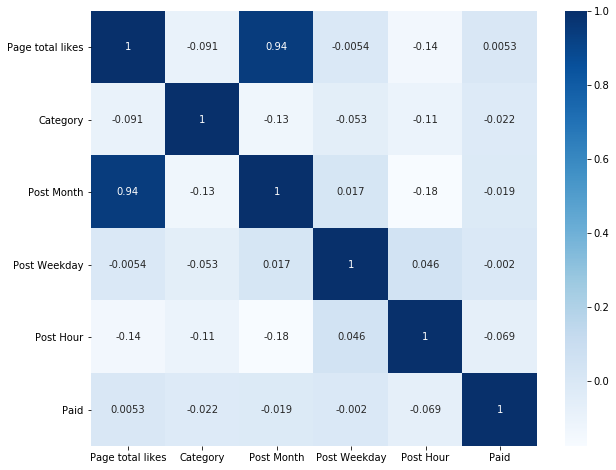

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)

# Checking for Null Values Graphical

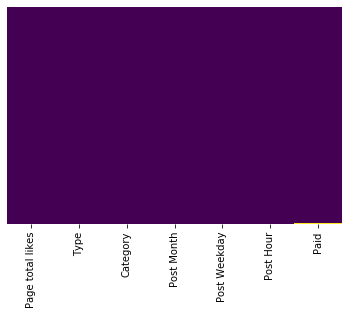

In [108]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

#  Replacing Null Value

In [109]:
data['Paid'].fillna(0,inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Checking for Null Values

In [110]:
data.isnull().sum()

Page total likes    0
Type                0
Category            0
Post Month          0
Post Weekday        0
Post Hour           0
Paid                0
dtype: int64

# Replacing Categorical values to Intiger values

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Type'] = encoder.fit_transform(data['Type'])
print(data.head())

   Page total likes  Type  Category  Post Month  Post Weekday  Post Hour  Paid
0            139441     1         2          12             4          3   0.0
1            139441     2         2          12             3         10   0.0
2            139441     1         3          12             3          3   0.0
3            139441     1         2          12             2         10   1.0
4            139441     1         2          12             2          3   0.0


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Assigning Target and Features

In [112]:
y = full_data['Lifetime Post Consumptions'].values
features = ['Page total likes','Type','Category','Post Month','Post Weekday','Post Hour','Paid']
X = data[features].iloc[:,:].values
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 1)

In [113]:
print(f"X = {X[:10]}")
print(f"y = {y[:10]}")

X = [[1.39441e+05 1.00000e+00 2.00000e+00 1.20000e+01 4.00000e+00 3.00000e+00
  0.00000e+00]
 [1.39441e+05 2.00000e+00 2.00000e+00 1.20000e+01 3.00000e+00 1.00000e+01
  0.00000e+00]
 [1.39441e+05 1.00000e+00 3.00000e+00 1.20000e+01 3.00000e+00 3.00000e+00
  0.00000e+00]
 [1.39441e+05 1.00000e+00 2.00000e+00 1.20000e+01 2.00000e+00 1.00000e+01
  1.00000e+00]
 [1.39441e+05 1.00000e+00 2.00000e+00 1.20000e+01 2.00000e+00 3.00000e+00
  0.00000e+00]
 [1.39441e+05 2.00000e+00 2.00000e+00 1.20000e+01 1.00000e+00 9.00000e+00
  0.00000e+00]
 [1.39441e+05 1.00000e+00 3.00000e+00 1.20000e+01 1.00000e+00 3.00000e+00
  1.00000e+00]
 [1.39441e+05 1.00000e+00 3.00000e+00 1.20000e+01 7.00000e+00 9.00000e+00
  1.00000e+00]
 [1.39441e+05 2.00000e+00 2.00000e+00 1.20000e+01 7.00000e+00 3.00000e+00
  0.00000e+00]
 [1.39441e+05 1.00000e+00 3.00000e+00 1.20000e+01 6.00000e+00 1.00000e+01
  0.00000e+00]]
y = [ 159 1674  154 1119  580 1389  364  305 1692  250]


# Analysing the changes made to the dataset

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  500 non-null    int64  
 1   Type              500 non-null    int32  
 2   Category          500 non-null    int64  
 3   Post Month        500 non-null    int64  
 4   Post Weekday      500 non-null    int64  
 5   Post Hour         500 non-null    int64  
 6   Paid              500 non-null    float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 25.5 KB


In [115]:
data.describe()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,1.074000,1.880000,7.038000,4.150000,7.840000,0.278000
std,16272.813214,0.429993,0.852675,3.307936,2.030701,4.368589,0.448462
min,81370.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,112676.000000,1.000000,1.000000,4.000000,2.000000,3.000000,0.000000
50%,129600.000000,1.000000,2.000000,7.000000,4.000000,9.000000,0.000000
75%,136393.000000,1.000000,3.000000,10.000000,6.000000,11.000000,1.000000
max,139441.000000,3.000000,3.000000,12.000000,7.000000,23.000000,1.000000


# Linear Regression Model

In [116]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_X, train_y)

predict_y = model.predict(val_X)
print(val_y[:5])
print(predict_y[:5])

[1034  966  126 1469 1427]
[1961.03308208 1024.18488998 -296.99979803 1192.37083181 1442.63139746]


In [138]:
# print(val_X)
# print(val_y)

# Plotting Actual vs Prediction

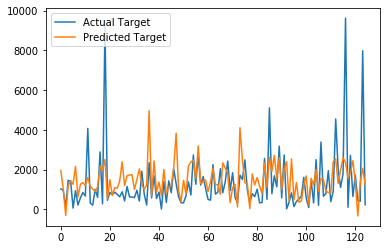

In [118]:
plt.plot(val_y, label = 'Actual Target')
plt.plot(predict_y, label = 'Predicted Target')
plt.legend(loc = 'upper left')

plt.show()


# Accuracy Score

In [130]:
accuracy = model.score(val_X,val_y)
print(accuracy)

0.149404113926644


# Mean Absolute Error

In [120]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(predict_y,val_y)
print(mae)

894.8430453549668


# Support Vector Regression Model

In [133]:
from sklearn.svm import SVR
svmodel = SVR(C=0.8, kernel = 'linear')
svmodel.fit(train_X,train_y)

predict_y = svmodel.predict(val_X)
print(val_y[:50])
print(predict_y[:50])

[1034  966  126 1469 1427   71  948  221  588  850  677 4074  318  219
 1014  609 2895  286 9237  463  852  740  870  763  641  889  431 1157
  629  631  597  969  423 1926  767  224 2356  580 1697  552  880   26
 1410  354 1438  848 2042 1290  632  339]
[2259.19434875 1846.92478508 3287.77326149 3405.02685112 -108.32382828
 -201.03270012 2117.7304129  3208.76345581 2686.29753632 3124.78934425
 2090.2442717  2949.94033951 3203.98124451 3324.48380226 2335.12437386
 2780.78266853  747.87368149 2311.95382065 3062.0007605  2962.38003296
 2339.34767288 2377.81280846 2193.6603064  -201.15506607 3151.306539
 1471.15471214 3259.0028624  1700.01701492 2914.31042236 2778.51318497
 2962.03853363 2187.81265396 2575.710998    491.262258   1871.38057465
 3127.55973953 2237.5003199  3276.04210037 1098.26458115 1840.86689514
 2119.36133713  810.34507698  233.86302322 2720.67883057 1857.76911873
 1981.8084845  2323.73680061  816.93818611 1355.43742889 3035.16147179]


# Accuracy Score

In [134]:
accuracy = svmodel.score(val_X,val_y)
print(accuracy)

-1.0238846765652503


# Plotting Actual vs Prediction

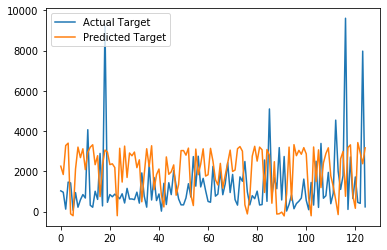

In [136]:
plt.plot(val_y, label = 'Actual Target')
plt.plot(predict_y, label = 'Predicted Target')
plt.legend(loc = 'upper left')

plt.show()

# Mean Absolute Error

In [124]:
mae = mean_absolute_error(predict_y,val_y)
print(mae)

1771.9807574296244


# BayesianRidge

In [125]:
from sklearn.linear_model import BayesianRidge
brmodel = BayesianRidge(compute_score = True)
brmodel.fit(train_X,train_y)

predict_y = brmodel.predict(val_X)
print(val_y[:])
print(predict_y[:])

[1034  966  126 1469 1427   71  948  221  588  850  677 4074  318  219
 1014  609 2895  286 9237  463  852  740  870  763  641  889  431 1157
  629  631  597  969  423 1926  767  224 2356  580 1697  552  880   26
 1410  354 1438  848 2042 1290  632  339  337  683 1389  727 2737 1268
 2755 1229 1655 1049  507  469 2251  771  874 2051  842 1389 2438  951
 1850  599  325 1728 1512 2493  985  337  795  644 1020  331  352 2567
  513 5106  795 1692 1140 3183  581 2741   31  364  834  145  402  518
  676 1619  561   97 1452  327 2506  211 3391  667  794 1952  396  913
 4550 2007 1106 1797 9614  112 2720  653 1725  460  412 7980  239]
[1435.06717653 1534.94658475 1248.37763965 1250.71595964 1964.40327883
 1970.22123414 1435.06719383 1240.83384386 1370.2067334  1266.38825615
 1461.41492605 1289.08945922 1275.65804494 1250.71601549 1435.06709319
 1313.4329899  1772.00732096 1425.71390787 1280.94704759 1280.94705002
 1425.71384828 1435.06713985 1435.06711049 1977.34758242 1250.71597903
 1600.8648

# Accuracy Score

In [126]:
accuracy = brmodel.score(train_X,train_y)
print(accuracy)

0.015298209789193606


# Plotting Actual vs Prediction

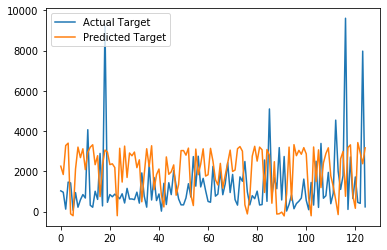

In [137]:
plt.plot(val_y, label = 'Actual Target')
plt.plot(predict_y, label = 'Predicted Target')
plt.legend(loc = 'upper left')

plt.show()

# Mean Absolute Error

In [128]:
mae = mean_absolute_error(predict_y,val_y)
print(mae)

984.6639429148996
